# HW2Q6

### import libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

### constants

In [2]:
EPSILON = 0.01
MAX_ITER = 10000
_ = np.seterr('ignore')

### functions

In [3]:
def plot_function():
    """
    Plot the function:
    
    .. math:: f(x_1, x_2) = (-2x_1^2 -3x_1x_2 + 2x_2^2)sin(x_1)
    """
    x1 = np.linspace(-6, 6, 50)
    x2 = np.linspace(-6, 6, 50)
    X1, X2 = np.meshgrid(x1, x2)
    Y = f(X1, X2)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()


def gradient_descent(x1_0, x2_0, max_iter, rho):
    """
    This function runs gradient descent.
    :param x1_0: initial x1
    :param x2_0: initial x2
    :param max_iter: max number of iteration
    :param rho: learning rate
    :return:
    """
    point_list = [np.array([x1_0, x2_0, f(x1_0, x2_0)])]
    curr_point = np.array([x1_0, x2_0, 0])
    for i in range(0, max_iter):
        curr_point, new_dir = single_descent(curr_point, rho)
        if np.linalg.norm(new_dir) < EPSILON:
            print("The total number of iterations is: {}".format(i + 1))
            return point_list
        elif np.abs(curr_point[0]) > 6 or np.abs(curr_point[1]) > 6:
            print("Out of range! (x1, x2) = ({}, {}), iteration number: {}".format(curr_point[0], curr_point[1], i + 1))
            return point_list
        elif np.any(np.isinf(curr_point)):
            print("It reaches infinite, does not converge!\n"
                  "The total number of iterations is: {}".format(i + 1))
            return point_list
        point_list += [curr_point]
    print("Exceeds max iteration: {}; with learning rate: {}".format(max_iter, rho))
    return point_list


def single_descent(point, rho):
    """
    perform a single descent from (t-1) to (t)
    :param point: point (t-1)
    :param rho: learning rate
    :return: an array of the (t) point and the dJ/dtheta
    """
    x1 = point[0]
    x2 = point[1]
    dx1 = np.sin(x1) * (-4. * x1 - 3. * x2) + np.cos(x1) * (-2. * np.power(x1, 2) - 3. * x1 * x2 + 2. * np.power(x2, 2))
    dx2 = np.sin(x1) * (4. * x2 - 3. * x1)
    new_x1 = x1 - dx1 * rho
    new_x2 = x2 - dx2 * rho
    new_y = f(new_x1, new_x2)
    return np.array([new_x1, new_x2, new_y]), np.array([dx1, dx2])


def f(x1, x2):
    """
    calculate the given function from given 2 inputs
    :param x1: input x1
    :param x2: input x2
    :return: out put f(x1,x2)
    """
    return np.sin(x1) * (-2. * np.power(x1, 2) - 3. * x1 * x2 + 2. * np.power(x2, 2))


def plot_learning_points(points):
    """
    Plot the points sequence generated by gradient descent
    :param points: Input points generated from gradient descent
    """
    df = pd.DataFrame(points, columns=['x1', 'x2', 'y'])
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    xs = df['x1'].values.tolist()
    ys = df['x2'].values.tolist()
    zs = df['y'].values.tolist()
    ax = plt.axes(projection='3d')
    ax.scatter3D(xs, ys, zs, c=zs)
    ax.plot3D(xs, ys, zs, 'gray')
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    plt.show()

### problem 1: run GD

The total number of iterations is: 1035
last five point here: [array([ -5.08707025,  -3.81801761, -75.25923664]), array([ -5.08706994,  -3.81800751, -75.25923674]), array([ -5.08706963,  -3.81799744, -75.25923685]), array([ -5.08706932,  -3.81798741, -75.25923695]), array([ -5.08706902,  -3.81797741, -75.25923705])]


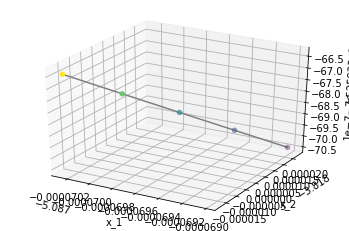

Out of range! (x1, x2) = (4.690925293816978, -6.003041432148811), iteration number: 104
last five point here: [array([   4.68178919,   -5.81502793, -105.41563231]), array([   4.68373442,   -5.85231595, -106.81268248]), array([   4.68561842,   -5.88976104, -108.22125791]), array([   4.68744345,   -5.92736346, -109.6414433 ]), array([   4.6892117 ,   -5.96512349, -111.07332413])]


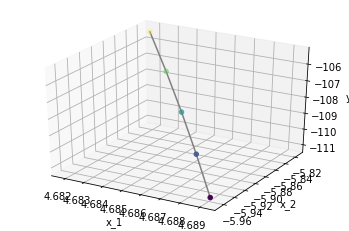

Out of range! (x1, x2) = (-1.1080098493551345, -6.001436451786327), iteration number: 111
last five point here: [array([ -1.09725251,  -5.91009732, -42.71438274]), array([ -1.09945549,  -5.92820674, -43.04787303]), array([ -1.10163133,  -5.94639521, -43.3841202 ]), array([ -1.10378146,  -5.96466288, -43.72314969]), array([ -1.10590721,  -5.9830099 , -44.06498683])]


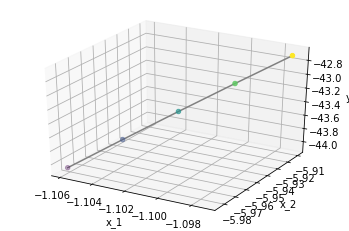

The total number of iterations is: 1574
last five point here: [array([ -5.08689987,  -3.81245419, -75.25923658]), array([ -5.08690018,  -3.81246432, -75.25923668]), array([ -5.08690049,  -3.81247441, -75.25923679]), array([ -5.0869008 ,  -3.81248447, -75.25923689]), array([ -5.0869011 ,  -3.81249449, -75.25923699])]


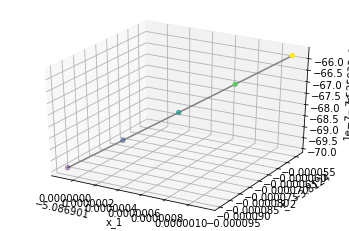

Out of range! (x1, x2) = (-6.036067610573693, 4.382200257918157), iteration number: 25
last five point here: [array([-5.79661649,  4.44921018, 23.26780038]), array([-5.84520252,  4.43275704, 20.65304467]), array([-5.89357908,  4.41779998, 18.10824141]), array([-5.94160169,  4.40437246, 15.64315143]), array([-5.98913763,  4.39250001, 13.26557804])]


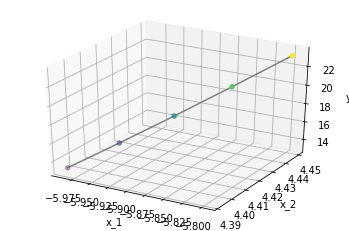

In [4]:
rho = 0.001

# point 1: (-3,-4)
point_result1 = gradient_descent(-3, -4, MAX_ITER, rho)
last_five_points1 = point_result1[len(point_result1) - 5: len(point_result1)]
print("last five point here: {}".format(last_five_points1))
plot_learning_points(last_five_points1)

# point 2: (4,-3)
point_result2 = gradient_descent(4, -3, MAX_ITER, rho)
last_five_points2 = point_result2[len(point_result2) - 5: len(point_result2)]
print("last five point here: {}".format(last_five_points2))
plot_learning_points(last_five_points2)

# point 3: (1,5)
point_result3 = gradient_descent(1, -5, MAX_ITER, rho)
last_five_points3 = point_result3[len(point_result3) - 5: len(point_result3)]
print("last five point here: {}".format(last_five_points3))
plot_learning_points(last_five_points3)

# point 4: (-4,-3)
point_result4 = gradient_descent(-4, -3, MAX_ITER, rho)
last_five_points4 = point_result4[len(point_result4) - 5: len(point_result4)]
print("last five point here: {}".format(last_five_points4))
plot_learning_points(last_five_points4)

# point 5: (-5,5)
point_result5 = gradient_descent(-5, 5, MAX_ITER, rho)
last_five_points5 = point_result5[len(point_result5) - 5: len(point_result5)]
print("last five point here: {}".format(last_five_points5))
plot_learning_points(last_five_points5)

From the plot, I find that the final points are different.

### problem 2 print the final 5 result of GDs

In [7]:
data = {
        '(-3,-4)': pd.DataFrame(last_five_points1, columns=['x1', 'x2', 'y']),
        '(4,-3)': pd.DataFrame(last_five_points2, columns=['x1', 'x2', 'y']),
        '(1,5)': pd.DataFrame(last_five_points3, columns=['x1', 'x2', 'y']),
        '(-4,-3)': pd.DataFrame(last_five_points4, columns=['x1', 'x2', 'y']),
        '(-5,5)': pd.DataFrame(last_five_points5, columns=['x1', 'x2', 'y'])}
min_points = pd.DataFrame()
for key in data:
    min_index = data[key]['y'].idxmin()
    print("Last five point in table for {}:".format(key))
    print(data[key])
    min_points = pd.concat([min_points, data[key].loc[min_index].to_frame().transpose()])
min_points.reset_index(drop=True, inplace=True)
min_index = min_points['y'].idxmin()
best_min_value = min_points.loc[min_index]
print("The overall min value is: {}".format(best_min_value["y"]))

Last five point in table for (-3,-4):
         x1        x2          y
0 -5.087070 -3.818018 -75.259237
1 -5.087070 -3.818008 -75.259237
2 -5.087070 -3.817997 -75.259237
3 -5.087069 -3.817987 -75.259237
4 -5.087069 -3.817977 -75.259237
Last five point in table for (4,-3):
         x1        x2           y
0  4.681789 -5.815028 -105.415632
1  4.683734 -5.852316 -106.812682
2  4.685618 -5.889761 -108.221258
3  4.687443 -5.927363 -109.641443
4  4.689212 -5.965123 -111.073324
Last five point in table for (1,5):
         x1        x2          y
0 -1.097253 -5.910097 -42.714383
1 -1.099455 -5.928207 -43.047873
2 -1.101631 -5.946395 -43.384120
3 -1.103781 -5.964663 -43.723150
4 -1.105907 -5.983010 -44.064987
Last five point in table for (-4,-3):
         x1        x2          y
0 -5.086900 -3.812454 -75.259237
1 -5.086900 -3.812464 -75.259237
2 -5.086900 -3.812474 -75.259237
3 -5.086901 -3.812484 -75.259237
4 -5.086901 -3.812494 -75.259237
Last five point in table for (-5,5):
         x1     

### problem 3 visulization

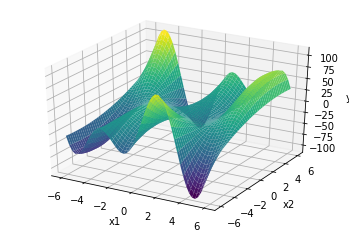

In [8]:
plot_function()

From the plot, we see that this plan is not concave and we can predict that it goes to infinity and negative infinity on very far point. Therefore, we may fall into local minimum and goes out of the [-6, 6] range. As a result, we might get different results from different starting point.